# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Impor the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [2]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 613


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [3]:
# Set the API base URL
url = "https://api.openweathermap.org/data/2.5/weather?units=metric&appid="+weather_api_key

# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = url + "&q=" + city
    
    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))
    
    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather = requests.get(city_url).json()

        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather['coord']['lat']
        city_lng = city_weather ['coord']['lon']
        city_max_temp = city_weather ['main']['temp_max']
        city_humidity = city_weather['main']['humidity']
        city_clouds = city_weather['clouds']['all']
        city_wind = city_weather['wind']['speed']
        city_country = city_weather['sys']['country']
        city_date = city_weather['dt']

        # Append the City information into city_data list
        city_data.append({"City": city, 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass
              
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | dampit
Processing Record 2 of Set 1 | beibei
Processing Record 3 of Set 1 | papatowai
Processing Record 4 of Set 1 | mount gambier
Processing Record 5 of Set 1 | waitangi
Processing Record 6 of Set 1 | edinburgh of the seven seas
Processing Record 7 of Set 1 | port-aux-francais
Processing Record 8 of Set 1 | georgetown
Processing Record 9 of Set 1 | port alfred
Processing Record 10 of Set 1 | blackmans bay
Processing Record 11 of Set 1 | west island
Processing Record 12 of Set 1 | yellowknife
Processing Record 13 of Set 1 | aasiaat
Processing Record 14 of Set 1 | selfoss
Processing Record 15 of Set 1 | keflavik
Processing Record 16 of Set 1 | lihue
Processing Record 17 of Set 1 | iguape
Processing Record 18 of Set 1 | aitape
Processing Record 19 of Set 1 | toropets
Processing Record 20 of Set 1 | vengerovo
Processing Record 21 of Set 1 | sesheke
Processing Record 22 of Set 1 | grytviken
Processin

Processing Record 40 of Set 4 | la rioja
Processing Record 41 of Set 4 | sinabang
Processing Record 42 of Set 4 | crane
Processing Record 43 of Set 4 | san sebastian de la gomera
Processing Record 44 of Set 4 | mersa matruh
Processing Record 45 of Set 4 | rio grande
Processing Record 46 of Set 4 | ivdel'
Processing Record 47 of Set 4 | heunghae
Processing Record 48 of Set 4 | udachny
Processing Record 49 of Set 4 | kenai
Processing Record 0 of Set 5 | lesosibirsk
Processing Record 1 of Set 5 | dronero
Processing Record 2 of Set 5 | polyarnyy
Processing Record 3 of Set 5 | nelson bay
Processing Record 4 of Set 5 | reggane
Processing Record 5 of Set 5 | el calafate
Processing Record 6 of Set 5 | mokhsogollokh
Processing Record 7 of Set 5 | midvagur
Processing Record 8 of Set 5 | ancud
Processing Record 9 of Set 5 | monze
Processing Record 10 of Set 5 | puerto san carlos
City not found. Skipping...
Processing Record 11 of Set 5 | puerto baquerizo moreno
Processing Record 12 of Set 5 | tal

Processing Record 35 of Set 8 | wenchang
Processing Record 36 of Set 8 | sassandra
Processing Record 37 of Set 8 | dryden
Processing Record 38 of Set 8 | dalnegorsk
Processing Record 39 of Set 8 | nema
Processing Record 40 of Set 8 | canarana
Processing Record 41 of Set 8 | chernogorsk
Processing Record 42 of Set 8 | sinazongwe
Processing Record 43 of Set 8 | uturoa
Processing Record 44 of Set 8 | harrismith
Processing Record 45 of Set 8 | makar'yev
Processing Record 46 of Set 8 | kavaratti
Processing Record 47 of Set 8 | vila franca do campo
Processing Record 48 of Set 8 | mafinga
Processing Record 49 of Set 8 | miguel pereira
Processing Record 0 of Set 9 | dudinka
Processing Record 1 of Set 9 | marks
Processing Record 2 of Set 9 | mananjary
Processing Record 3 of Set 9 | barcelos
Processing Record 4 of Set 9 | hancheng
Processing Record 5 of Set 9 | usol'ye
Processing Record 6 of Set 9 | gebeit
Processing Record 7 of Set 9 | pestovo
Processing Record 8 of Set 9 | oriximina
Processing

Processing Record 25 of Set 12 | orsa
Processing Record 26 of Set 12 | anibare
City not found. Skipping...
Processing Record 27 of Set 12 | inekar
City not found. Skipping...
Processing Record 28 of Set 12 | moramanga
Processing Record 29 of Set 12 | telerghma
Processing Record 30 of Set 12 | faya-largeau
Processing Record 31 of Set 12 | apatity
Processing Record 32 of Set 12 | yoloten
Processing Record 33 of Set 12 | remire-montjoly
Processing Record 34 of Set 12 | tchintabaraden
Processing Record 35 of Set 12 | am djarass
City not found. Skipping...
Processing Record 36 of Set 12 | sidhpura
Processing Record 37 of Set 12 | watsa
Processing Record 38 of Set 12 | kapa'a
Processing Record 39 of Set 12 | kon tum
Processing Record 40 of Set 12 | berdigestyakh
Processing Record 41 of Set 12 | las veredas
Processing Record 42 of Set 12 | kupang
Processing Record 43 of Set 12 | fortuna
Processing Record 44 of Set 12 | kurmuk
Processing Record 45 of Set 12 | brookings
Processing Record 46 of 

In [4]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)
# Show Record Count
city_data_df.count()

City          594
Lat           594
Lng           594
Max Temp      594
Humidity      594
Cloudiness    594
Wind Speed    594
Country       594
Date          594
dtype: int64

In [5]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,dampit,-8.2116,112.7493,23.68,96,98,1.02,ID,1713742325
1,beibei,29.8256,106.4339,19.65,94,100,0.48,CN,1713742325
2,papatowai,-46.5619,169.4708,10.03,67,74,7.95,NZ,1713742323
3,mount gambier,-37.8333,140.7667,14.56,55,6,2.41,AU,1713742329
4,waitangi,-43.9535,-176.5597,14.34,87,37,3.13,NZ,1713742330


In [6]:
# Export the City_Data into a csv
city_data_df.to_csv("output_data/cities.csv", index_label="City_ID")

In [7]:
# Read saved data
city_data_df = pd.read_csv("output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,dampit,-8.2116,112.7493,23.68,96,98,1.02,ID,1713742325
1,beibei,29.8256,106.4339,19.65,94,100,0.48,CN,1713742325
2,papatowai,-46.5619,169.4708,10.03,67,74,7.95,NZ,1713742323
3,mount gambier,-37.8333,140.7667,14.56,55,6,2.41,AU,1713742329
4,waitangi,-43.9535,-176.5597,14.34,87,37,3.13,NZ,1713742330


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

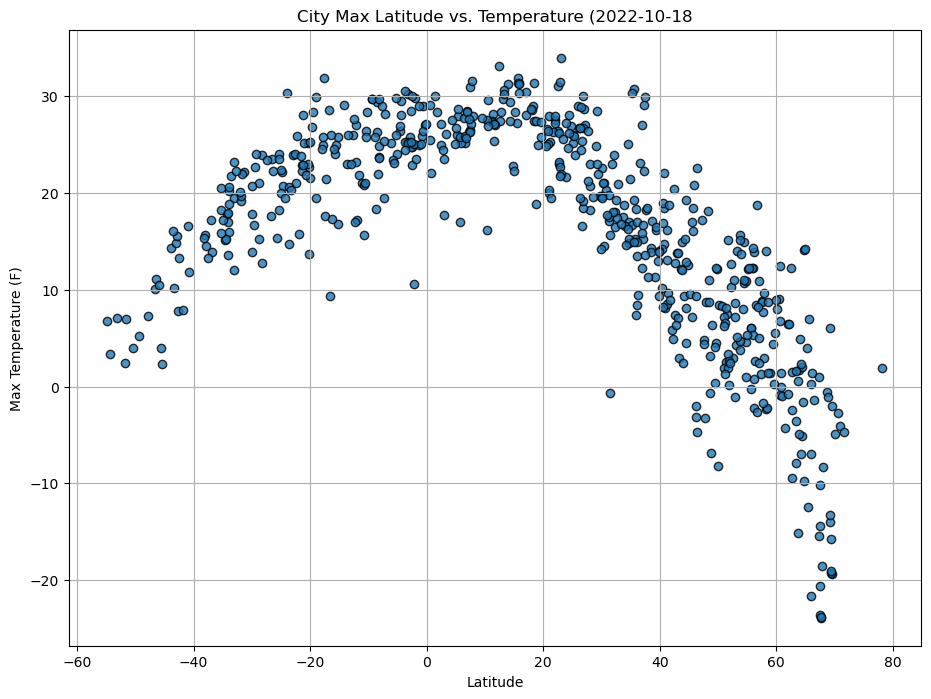

In [8]:
# Build scatter plot for latitude vs. temperature
x_values = city_data_df["Lat"]
y_values = city_data_df["Max Temp"]

# Incorporate the other graph properties
fig1, ax1 = plt.subplots(figsize=(11,8))
plt.scatter(x_values, y_values, edgecolor="black", linewidth=1,marker="o", alpha=0.8)
plt.title(f"City Max Latitude vs. Temperature (2022-10-18")
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (F)")
plt.grid()
# Save the figure
plt.savefig("output_data/Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

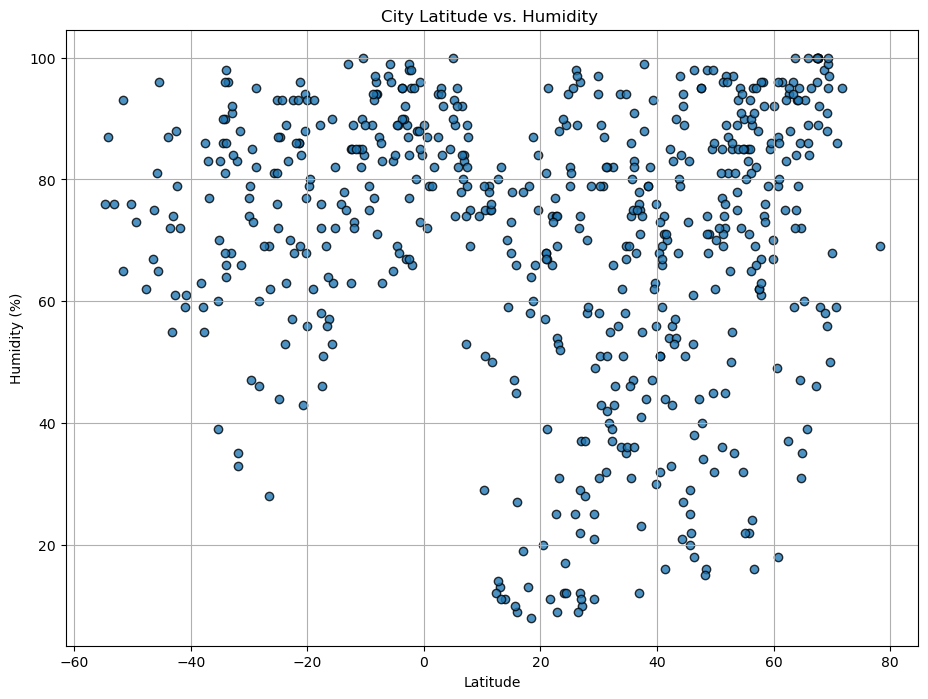

In [9]:
# Build the scatter plots for latitude vs. humidity
x_values = city_data_df["Lat"]
y_values = city_data_df["Humidity"]

# Incorporate the other graph properties
fig1, ax1 = plt.subplots(figsize=(11, 8))
plt.scatter(x_values, y_values, edgecolor="black", linewidth=1, marker="o", alpha=0.8)
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.title(f"City Latitude vs. Humidity ")
plt.grid()

# Save the figure
plt.savefig("output_data/Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

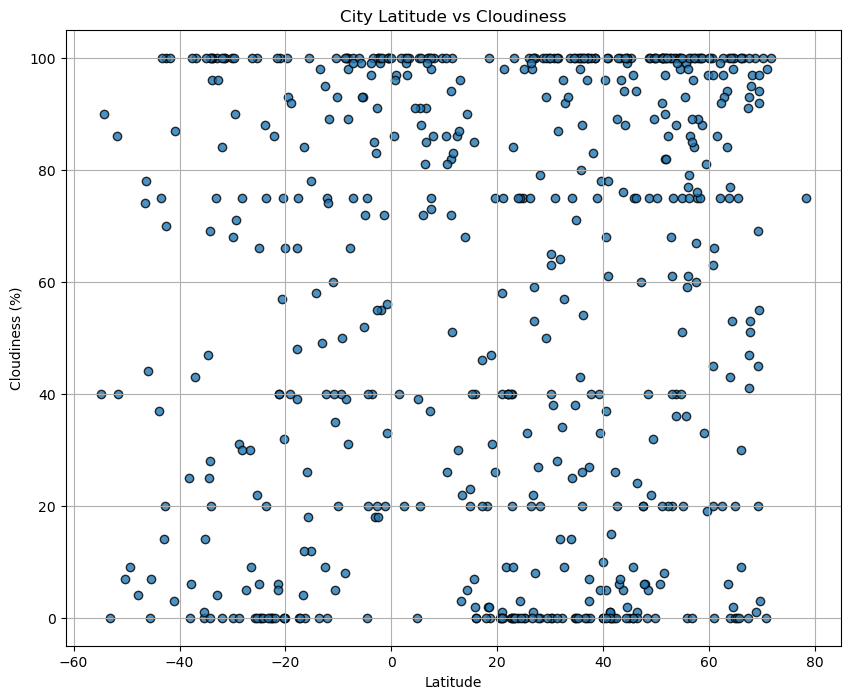

In [10]:
# Build the scatter plots for latitude vs. cloudiness
x_values = city_data_df["Lat"]
y_values = city_data_df["Cloudiness"]

# Incorporate the other graph properties
fig1, ax1 = plt.subplots(figsize=(10,8))
markersize=12
plt.scatter(x_values, y_values, edgecolor="black", linewidth=1, marker="o", alpha=0.8)
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.title(f"City Latitude vs Cloudiness")
plt.grid()

# Save the figure
plt.savefig("output_data/Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

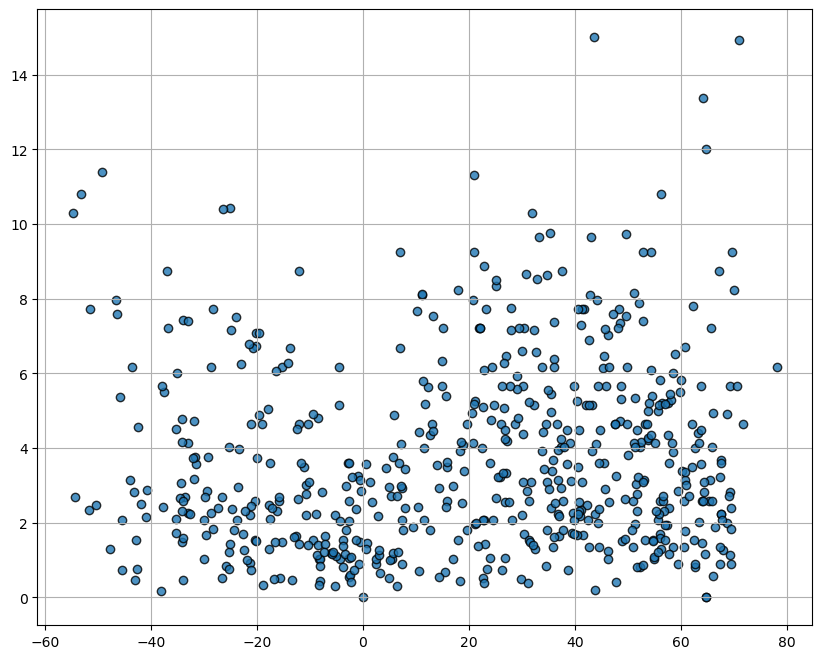

In [25]:
# Assuming city_data_df is defined and contains the data
import matplotlib.pyplot as plt

# Build the scatter plots for latitude vs. wind speed
x_values = city_data_df["Lat"]
y_values = city_data_df["Wind Speed"]

# Incorporate the other graph properties
fig1, ax1 = plt.subplots(figsize=(10,8))
markersize=12
plt.scatter(x_values, y_values, edgecolor="black", linewidth=1, marker="o", alpha=0.8)
plt.xlabel=("Latitude")
plt.ylable=("Wind Speed (m/s)")
plt.title= (f"City Latitude vs. Wind Speed")
plt.grid()

# Save the figure
plt.savefig("output_data/Fig4.png")

plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [26]:
import matplotlib.pyplot as plt
from scipy.stats import linregress
# Define a function to create Linear Regression plots

def plot_linear_regression(x_values, y_values, title, text_coordinates):
    # Perform linear regression
    (slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
    
    # Calculate the regression line
    regress_values = x_values * slope + intercept
    
    # Get the equation of the line
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    
    # Create the scatter plot
    plt.scatter(x_values, y_values)
    
    # Plot the regression line
    plt.plot(x_values, regress_values, "r-")
    
    # Annotate the equation on the plot
    plt.annotate(line_eq, text_coordinates, fontsize=15, color="red")
    
    # Annotate the R-squared value
    plt.show()

In [27]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemi_weather_df = city_data_df.loc[city_data_df["Lat"] >= 0]

# Display sample data
northern_hemi_weather_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
1,beibei,29.8256,106.4339,19.65,94,100,0.48,CN,1713742325
7,georgetown,5.4112,100.3354,27.96,89,20,1.03,MY,1713742214
11,yellowknife,62.4560,-114.3525,12.29,37,20,1.54,CA,1713742334
12,aasiaat,68.7098,-52.8699,-0.54,98,100,1.99,GL,1713742334
13,selfoss,63.9331,-20.9971,1.69,75,43,1.45,IS,1713742335


In [28]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df = city_data_df.loc[city_data_df["Lat"] < 0]

# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,dampit,-8.2116,112.7493,23.68,96,98,1.02,ID,1713742325
2,papatowai,-46.5619,169.4708,10.03,67,74,7.95,NZ,1713742323
3,mount gambier,-37.8333,140.7667,14.56,55,6,2.41,AU,1713742329
4,waitangi,-43.9535,-176.5597,14.34,87,37,3.13,NZ,1713742330
5,edinburgh of the seven seas,-37.0676,-12.3116,17.19,83,43,8.74,SH,1713742331


###  Temperature vs. Latitude Linear Regression Plot

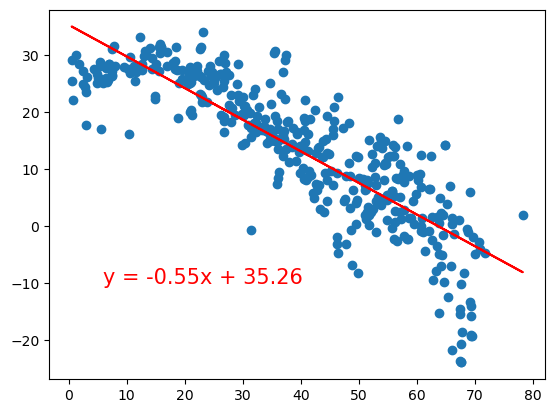

In [29]:
# Linear regression on Northern Hemisphere
x_values = northern_hemi_weather_df["Lat"]
y_values = northern_hemi_weather_df["Max Temp"]
plot_linear_regression(x_values, y_values, "Max Temp",(6,-10))

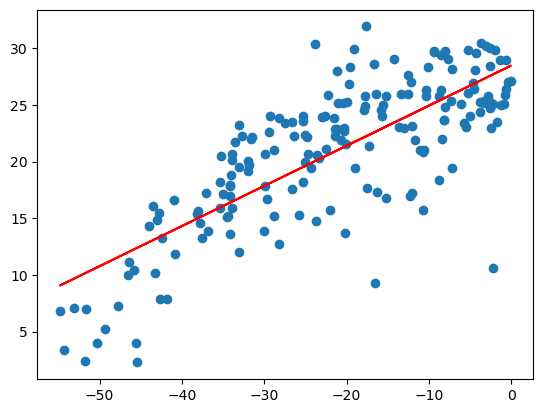

In [30]:
# Linear regression on Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Max Temp"]
plot_linear_regression(x_values, y_values, "Max Temp", (-55, 35))

**Discussion about the linear relationship:** Based on this scatter plot data, we can see that there is a strong coorelation between the Latitude coordiantes and Max Temp index. 

### Humidity vs. Latitude Linear Regression Plot

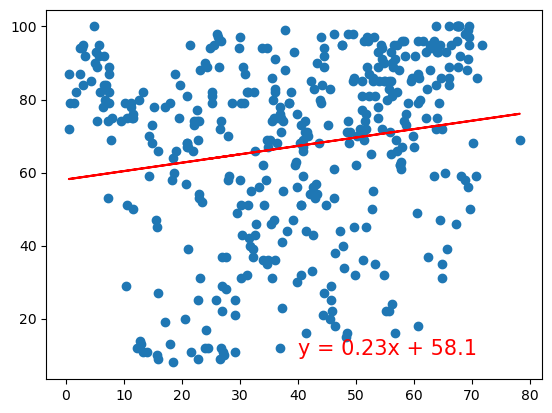

In [31]:
# Northern Hemisphere
x_values = northern_hemi_weather_df["Lat"]
y_values = northern_hemi_weather_df["Humidity"]
plot_linear_regression(x_values, y_values, "Humidity",(40,10))

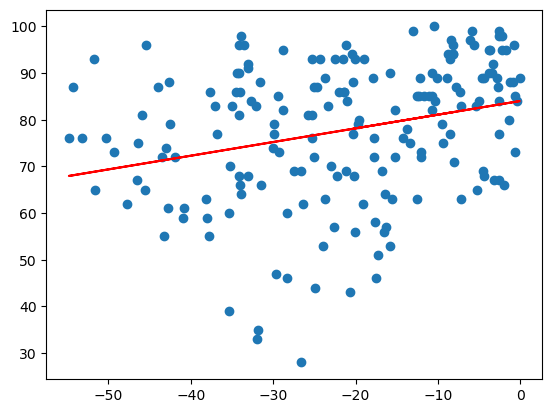

In [32]:
# Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Humidity"]
plot_linear_regression(x_values, y_values, "Humidity", (-50, 20))

**Discussion about the linear relationship:** Based on the data, there seems to be a weak or non existing coorelation with the latitude and Humidity.

### Cloudiness vs. Latitude Linear Regression Plot

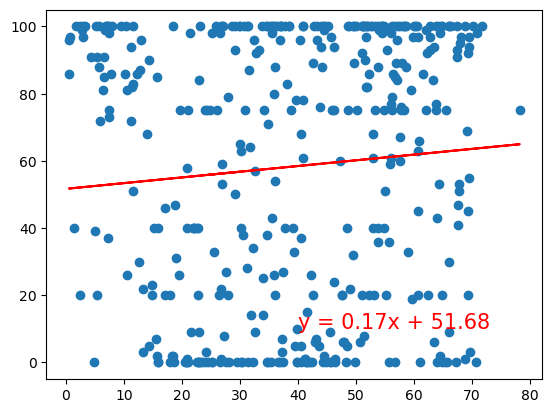

In [33]:
# Northern Hemisphere
x_values = northern_hemi_weather_df["Lat"]
y_values = northern_hemi_weather_df["Cloudiness"]
plot_linear_regression(x_values, y_values, "Cloudiness", (40,10))

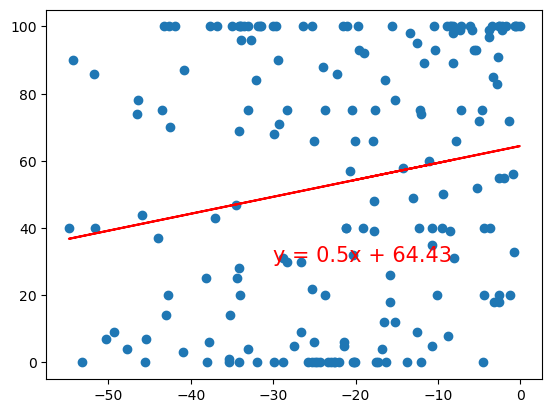

In [34]:
# Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Cloudiness"]
plot_linear_regression(x_values, y_values, "Cloudiness", (-30,30))

**Discussion about the linear relationship:** Looking at the data plots from Windspeed and cloudiness, we can see that there is no coorlelation between the the two. 

### Wind Speed vs. Latitude Linear Regression Plot

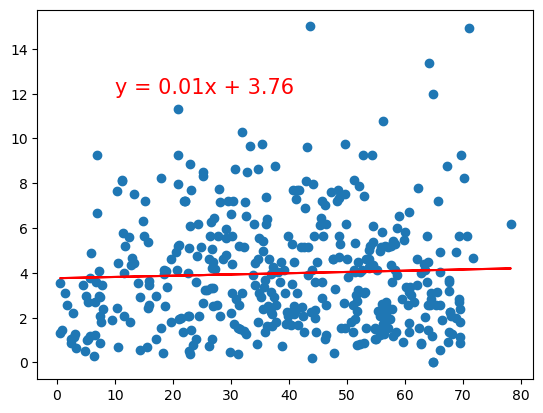

In [35]:
# Northern Hemisphere
x_values = northern_hemi_weather_df["Lat"]
y_values = northern_hemi_weather_df["Wind Speed"]
plot_linear_regression(x_values, y_values, "Wind Speed", (10,12))

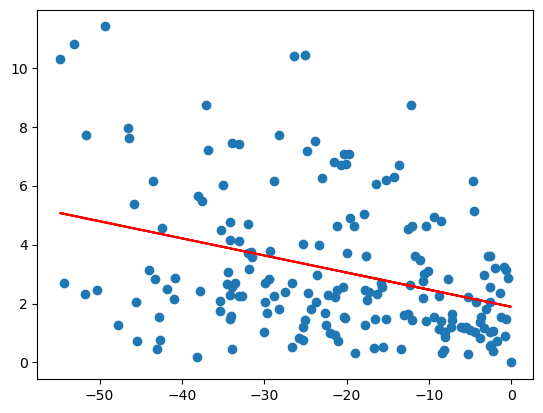

In [36]:
# Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Wind Speed"]
plot_linear_regression(x_values, y_values, "Wind Speed", (-50, 12))

**Discussion about the linear relationship:** Looking at the data, it's reasonable to conclude that the latitude and wind speed have little coorelation. 